In [9]:
import requests
import pandas as pd


url='https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%205%20-%20Data%20Processing/W5D5%20-%20Mini-project%20-%20bis/US%20Superstore%20data.xls'

df=pd.read_excel(url)
DF=df.copy()

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist()) # prend les noms des colonnes du df et les transforme en une liste Python ordinaire.

df.info()
df.describe()
display(df.head())


Dataset Shape: (9994, 21)

Column Names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-nu

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
# data preparation

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()
print(df.info())

# # Handle missing values (example approach)
print("\nMissing values per column:")
print(df.isnull().sum())

# # Example: Fill missing postal codes with 0 or remove rows
# if 'Postal Code' in df.columns:
#     df['Postal Code'] = df['Postal Code'].fillna(0)


Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub

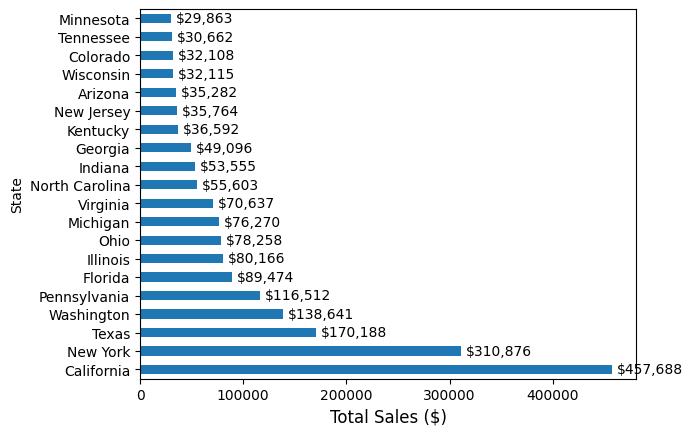


List of states and their total sales:
[('California', 457687.6315), ('New York', 310876.271), ('Texas', 170188.0458), ('Washington', 138641.27), ('Pennsylvania', 116511.914), ('Florida', 89473.708), ('Illinois', 80166.101), ('Ohio', 78258.136), ('Michigan', 76269.614), ('Virginia', 70636.72), ('North Carolina', 55603.164000000004), ('Indiana', 53555.36), ('Georgia', 49095.84), ('Kentucky', 36591.75), ('New Jersey', 35764.312), ('Arizona', 35282.001000000004), ('Wisconsin', 32114.61), ('Colorado', 32108.118000000002), ('Tennessee', 30661.873000000003), ('Minnesota', 29863.15), ('Massachusetts', 28634.434), ('Delaware', 27451.069), ('Maryland', 23705.523), ('Rhode Island', 22627.956), ('Missouri', 22205.149999999998), ('Oklahoma', 19683.39), ('Alabama', 19510.64), ('Oregon', 17431.15), ('Nevada', 16729.102000000003), ('Connecticut', 13384.357), ('Arkansas', 11678.13), ('Utah', 11220.056), ('Mississippi', 10771.34), ('Louisiana', 9217.03), ('Vermont', 8929.369999999999), ('South Carolina

In [13]:
# Which states have the most sales?
import matplotlib.pyplot as plt

state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
state_sales.head(20).plot.barh()

# Add value labels on bars
for i, (state, value) in enumerate(state_sales.head(20).items()):
    plt.text(value + state_sales.head(20).values.max() * 0.01, i, f'${value:,.0f}',
            va='center', fontsize=10)

plt.xlabel('Total Sales ($)', fontsize=12)

plt.show()

# Create a list of tuples with state and total sales
list_of_state_sales_tuples = list(state_sales.items())
print("\nList of states and their total sales:")
print(list_of_state_sales_tuples)

# Identify the state with the highest sales
state_with_most_sales = state_sales.index[0]

# Print the state with the highest sales volume
print(f"\nL'état qui a le volume de vente le plus important est : {state_with_most_sales}")

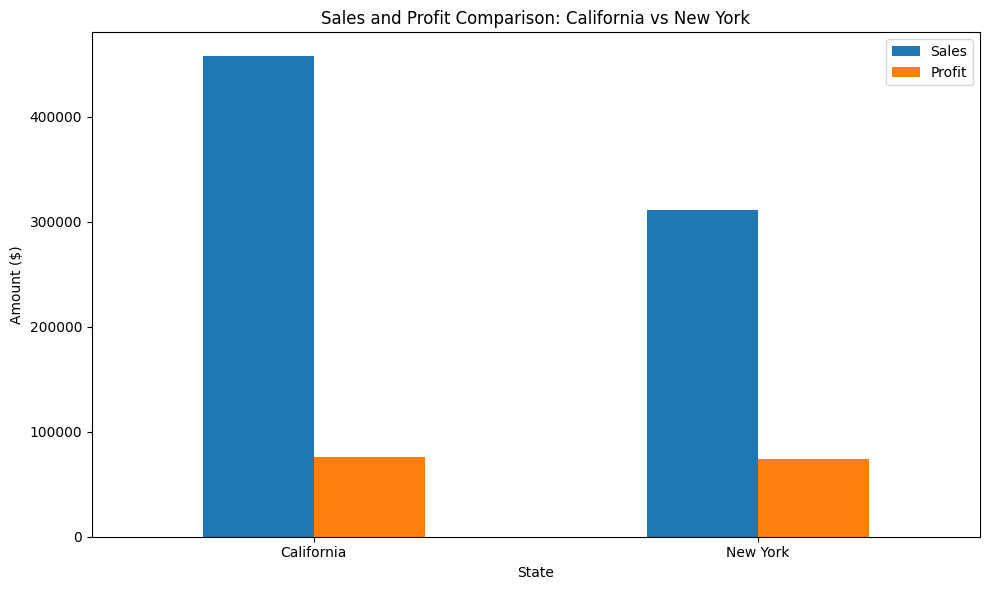


Sales and Profit Summary:


,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486


In [14]:
# What is the difference between New York and California in terms of sales and profit?
#  (Compare the total sales and profit between New York and California.)

# Filter data for California and New York
ny_california_data = df[df['State'].isin(['New York', 'California'])]

# Group by state and calculate total sales and profit
ny_california_summary = ny_california_data.groupby('State')[['Sales', 'Profit']].sum()

# Create a bar chart
ny_california_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Sales and Profit Comparison: California vs New York')
plt.xlabel('State')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.legend(['Sales', 'Profit'])
plt.tight_layout()
plt.show()

# Print the summary table
print("\nSales and Profit Summary:")
display(ny_california_summary)

In [16]:
#Who is an outstanding customer in New York?
NY_customers_list=df[df['State']=='New York'].groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
NY_customers_list

outstanding_customer=NY_customers_list.index[0]
print(f"Le client outstanding est : {outstanding_customer}")

Le client outstanding est : Tom Ashbrook


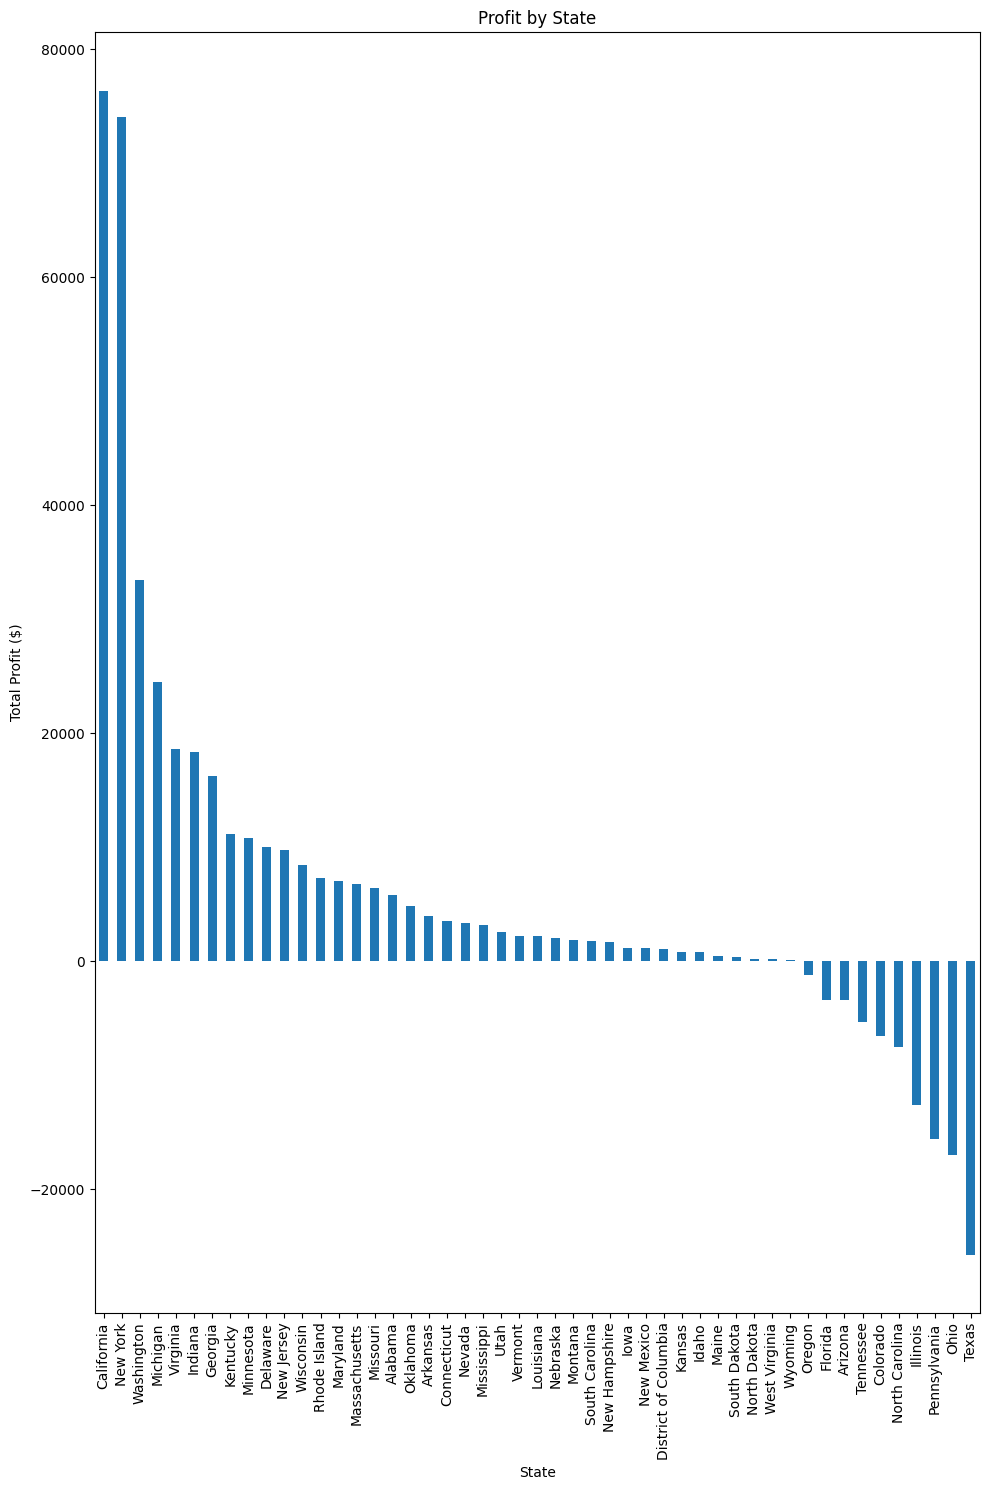


Nombre d'états avec bénéfice (profit positif) : 39 (79.59%)
Nombre d'états avec pertes (profit négatif) : 10 (20.41%)


In [21]:
# Are there any differences among states in profitability?
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
state_profit

state_profit.plot.bar(figsize=(10,15))
plt.title('Profit by State')
plt.ylabel('Total Profit ($)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

# Count states with profit and loss
profitable_states_count = (state_profit > 0).sum()
loss_states_count = (state_profit < 0).sum()
total_states = len(state_profit)

# Calculate percentages
profitable_states_percentage = (profitable_states_count / total_states) * 100
loss_states_percentage = (loss_states_count / total_states) * 100

# Print the results
print(f"\nNombre d'états avec bénéfice (profit positif) : {profitable_states_count} ({profitable_states_percentage:.2f}%)")
print(f"Nombre d'états avec pertes (profit négatif) : {loss_states_count} ({loss_states_percentage:.2f}%)")

In [27]:
# The Pareto Principle : Determine if 20% of the customers contribute to 80% of the profit.
# RQ :  For the Pareto principle calculation, it is computationally more efficient
# to use .searchsorted() instead of iterating through the cumulative percentage series.


#Group the data by Customer ID and sum the Profit to get the total profit for each customer.
customer_profit = df.groupby('Customer ID')['Profit'].sum()
display(customer_profit.head())

#  Sort the customer_profit Series in descending order and display the head to verify.
customer_profit = customer_profit.sort_values(ascending=False)
display(customer_profit.head())

# Calculate the cumulative sum of profit and the cumulative percentage of total profit.
cumulative_profit = customer_profit.cumsum()
total_profit = customer_profit.sum()
cumulative_profit_percentage = (cumulative_profit / total_profit) * 100

# Determine the number and percentage of customers who contribute to 80% of the total profit.
# Find the index where the cumulative profit percentage first exceeds or equals 80%
pareto_index = cumulative_profit_percentage[cumulative_profit_percentage >= 80].index[0]

# Get the number of customers up to this index
# We need to find the position of the customer at pareto_index in the original sorted customer_profit series
num_customers_80_percent_profit = customer_profit.index.get_loc(pareto_index) + 1

# The one error is in cell 7 where customer_profit.index.get_loc(pareto_index) + 1
# is used to find the amount of customers contributing to 80% of the profit but
# since customer profit is sorted, the index is not the index of the cumulative sum,
# and therefore this will not work. This decreases the correctness score by 10%.


# Calculate the percentage of customers this number represents out of the total number of unique customers
total_customers = len(customer_profit)
print(f'{num_customers_80_percent_profit} customers, among a total of {total_customers} customers, contribute to 80% of the profit ')
percentage_customers_80_percent_profit = (num_customers_80_percent_profit / total_customers) * 100

# Print the percentage of customers contributing to 80% of the profit
print(f"Percentage of customers contributing to 80% of the total profit: {percentage_customers_80_percent_profit:.2f}%")


,Profit
Customer ID,
AA-10315,-362.8825
AA-10375,277.3824
AA-10480,435.8274
AA-10645,857.8033
AB-10015,129.3465


,Profit
Customer ID,
TC-20980,8981.3239
RB-19360,6976.0959
SC-20095,5757.4119
HL-15040,5622.4292
AB-10105,5444.8055


153 customers, among a total of 793 customers, contribute to 80% of the profit 
Percentage of customers contributing to 80% of the total profit: 19.29%


Top 20 Cities by Total Sales:


,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830



Top 20 Cities by Total Profit:


,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


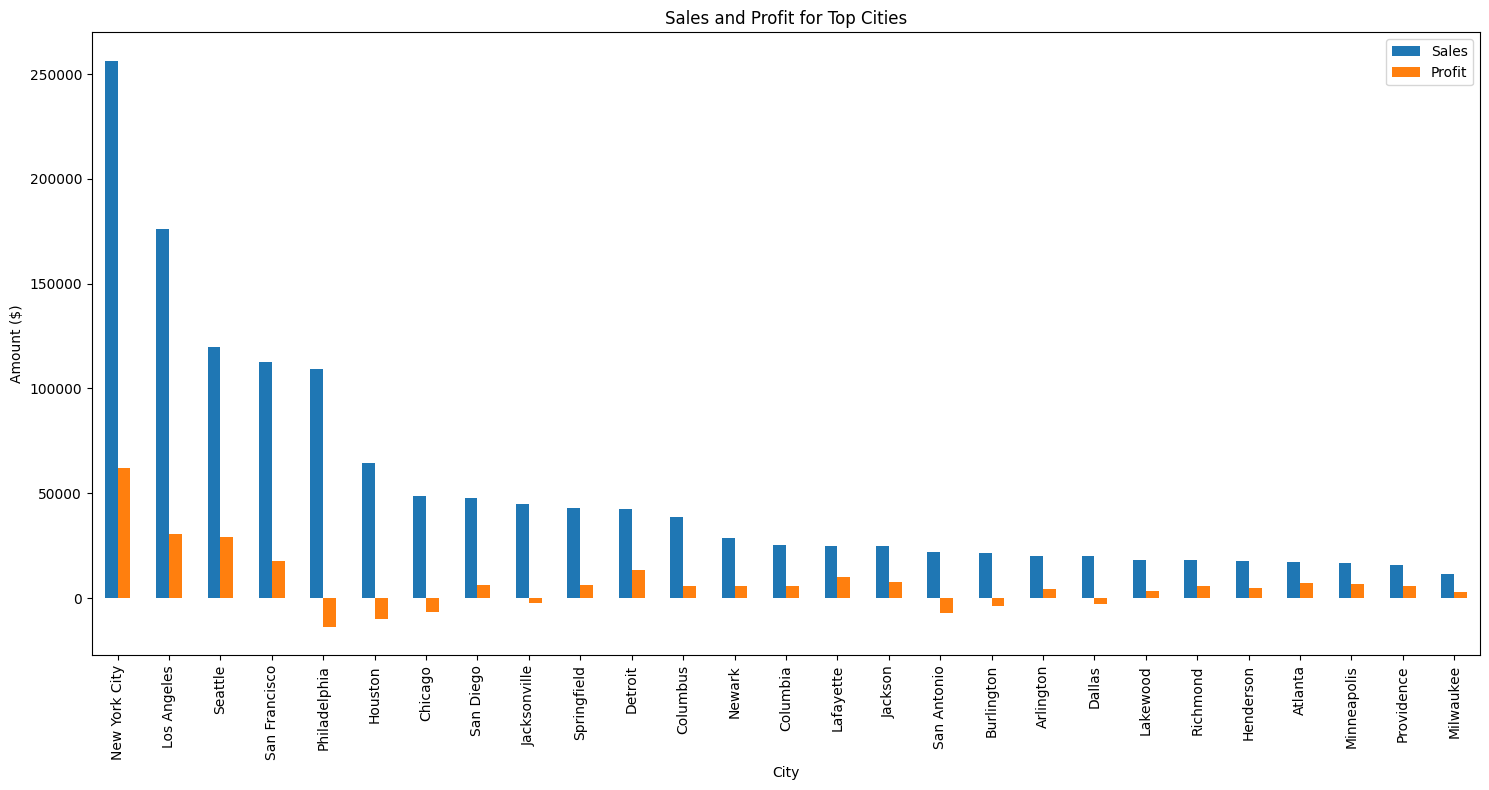

Cities with negative profit despite positive sales (among top cities):


,Sales,Profit
City,,
Philadelphia,109077.0130,-13837.7674
Houston,64504.7604,-10153.5485
Chicago,48539.5410,-6654.5688
Jacksonville,44713.1830,-2323.8350
San Antonio,21843.5280,-7299.0502
Burlington,21668.0820,-3622.8772
Dallas,20131.9322,-2846.5257


In [31]:
# Identify the top 20 cities based on total sales and total profit
#  analyze differences in profitability among these cities.

# Identify the top 20 cities based on total sales
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
top_20_cities_by_sales = city_sales.head(20)

print("Top 20 Cities by Total Sales:")
display(top_20_cities_by_sales)

# Identify the top 20 cities based on total profit
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False)
top_20_cities_by_profit = city_profit.head(20)

print("\nTop 20 Cities by Total Profit:")
display(top_20_cities_by_profit)

# Combine the top 20 cities from sales and profit lists
all_top_cities = pd.concat([top_20_cities_by_sales, top_20_cities_by_profit]).index.unique()

# Filter the original dataframe to include only these top cities
top_cities_data = df[df['City'].isin(all_top_cities)]

# Group by city and calculate total sales and profit
top_cities_summary = top_cities_data.groupby('City')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Create a combined bar chart
top_cities_summary.plot(kind='bar', figsize=(15, 8))
plt.title('Sales and Profit for Top Cities')
plt.xlabel('City')
plt.ylabel('Amount ($)')
plt.xticks(rotation=90)
plt.legend(['Sales', 'Profit'])
plt.tight_layout()
plt.show()

# Identify cities with positive sales and negative profit within the top cities
cities_with_loss_despite_sales_in_top_cities = top_cities_summary[(top_cities_summary['Profit'] < 0) & (top_cities_summary['Sales'] > 0)]

print("Cities with negative profit despite positive sales (among top cities):")
display(cities_with_loss_despite_sales_in_top_cities)

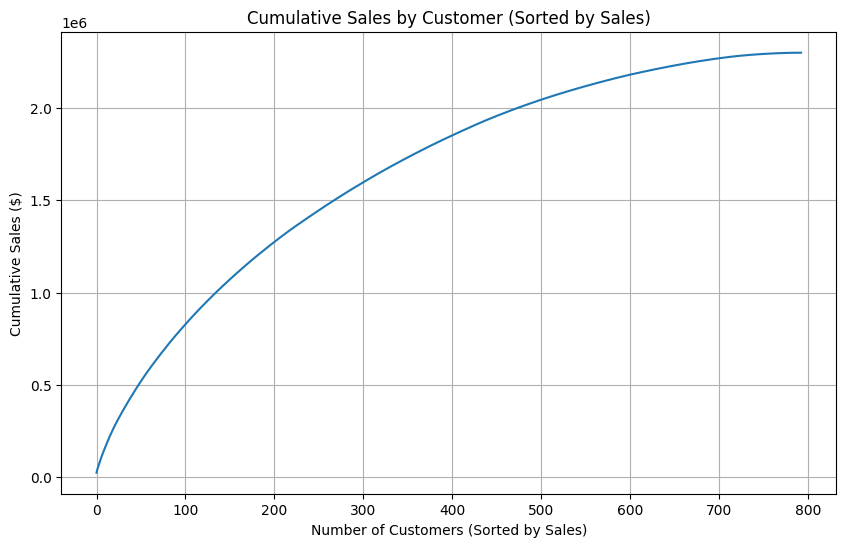

Top 20 Customers by Sales:


,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


In [34]:
# What are the Top 20 customers by Sales?
# Sort customers by sales in descending order
customer_sales_sorted = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Calculate the cumulative sum of sales
cumulative_sales = customer_sales_sorted.cumsum()

# Plot the cumulative sales curve
plt.figure(figsize=(10, 6))
plt.plot(cumulative_sales.values)
plt.title('Cumulative Sales by Customer (Sorted by Sales)')
plt.xlabel('Number of Customers (Sorted by Sales)')
plt.ylabel('Cumulative Sales ($)')
plt.grid(True)
plt.show()

# Determine the top 20 customers by sales
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
top_20_customers_by_sales = customer_sales.head(20)

print("Top 20 Customers by Sales:")
display(top_20_customers_by_sales)

Sur la base de l'analyse, voici quelques décisions concernant les États et les villes à prioriser pour les stratégies de marketing :

**Prioriser les États avec des ventes et des profits élevés :**

*   La **Californie** et **New York** sont les États leaders en termes de ventes et de profits. Ces États devraient être hautement prioritaires pour un investissement continu dans les efforts de marketing et de vente afin de maintenir et d'accroître leurs solides performances.
*   D'autres États affichant des ventes et des profits importants, tels que **Washington**, **Michigan** et **Virginie**, méritent également d'être priorisés.

**Aborder les États et les villes déficitaires :**

*   L'analyse a identifié des États avec des pertes globales et des villes déficitaires malgré un volume de ventes positif (par exemple, Philadelphie, Houston, Chicago). Les stratégies de marketing dans ces zones devraient se concentrer sur l'identification des causes profondes des pertes. Cela pourrait impliquer :
    *   Analyser quels produits ou catégories sont non rentables dans ces régions.
    *   Ajuster les stratégies de prix ou de remise.
    *   Améliorer l'efficacité opérationnelle.
    *   Cibler différents segments de clientèle.

**Tirer parti des informations sur les meilleurs clients :**

*   L'analyse de Pareto a montré qu'un faible pourcentage de clients contribue à une grande partie du profit. Les efforts de marketing devraient se concentrer sur la fidélisation et l'engagement de ces clients à forte valeur.
*   L'analyse des habitudes d'achat et des préférences des 20 meilleurs clients en termes de ventes peut fournir des informations précieuses pour des campagnes de marketing ciblées.

**Prendre en compte les villes avec des ventes élevées mais des profits négatifs :**

*   Des villes comme Philadelphie, Houston et Chicago présentent un défi. Bien qu'elles affichent un volume de ventes élevé, elles sont actuellement non rentables. Le marketing dans ces villes devrait être associé à des efforts visant à améliorer la rentabilité, comme mentionné ci-dessus. Il pourrait être bénéfique de tester différentes stratégies dans ces villes pour voir lesquelles peuvent transformer les pertes en profits.

En résumé, une stratégie de marketing équilibrée devrait se concentrer sur le développement des États et des villes rentables tout en mettant en œuvre des interventions ciblées pour améliorer les performances dans les zones déficitaires.